# Haberman Survival Data Set

Objective: 
     1. To check the survival status of patients who had undergone breast cancer surgery.
     2. Will they survive for 5 years or longer or died within 5 years.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#load haberman dataset into pandas framework
haber = pd.read_csv('haberman.csv')

In [9]:
#Data points and Features
print(haber.shape)

(305, 4)


In [3]:
#Columns name in dataset
print(haber.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [11]:
#Columns name are not given so giving names to columns
haber.columns = ['Age','Operation_year','Axillary_Nodes','Survival_status']
print(haber.columns)

Index(['Age', 'Operation_year', 'Axillary_Nodes', 'Survival_status'], dtype='object')


In [12]:
# Data-points for class-label(survival_status),patients survived 5 years or longer and
# patients died within 5 years
haber["Survival_status"].value_counts()
#haber is an imbalanced data set

1    224
2     81
Name: Survival_status, dtype: int64

# 2-D Scatter Plot

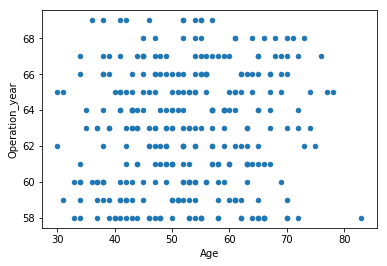

In [10]:
# Understand labels and scales
haber.plot(kind='scatter',x='Age', y='Operation_year')
plt.show()

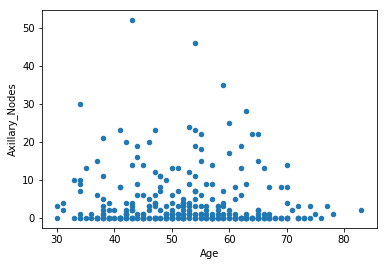

In [9]:
haber.plot(kind='scatter',x='Age',y='Axillary_Nodes')
plt.show()

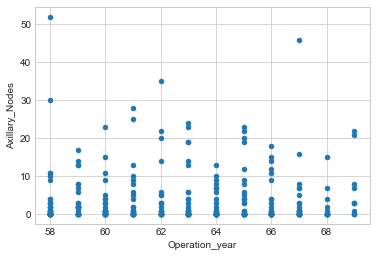

In [25]:
haber.plot(kind='scatter',x='Operation_year',y='Axillary_Nodes')
plt.show()

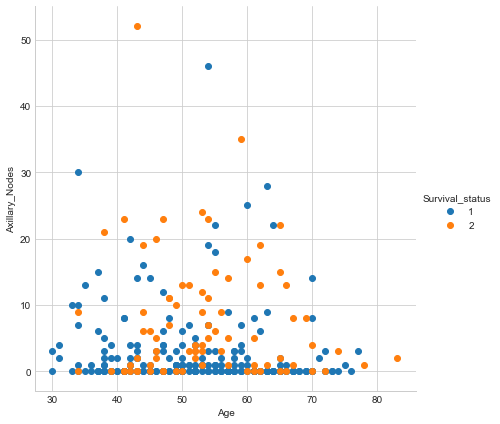

In [24]:
#2-D scatter plot with color coding using seaborn
sns.set_style('whitegrid');

sns.FacetGrid(haber, hue="Survival_status", size=6) \
   .map(plt.scatter, "Age","Axillary_Nodes") \
   .add_legend();
plt.show()

# Pair-Plot

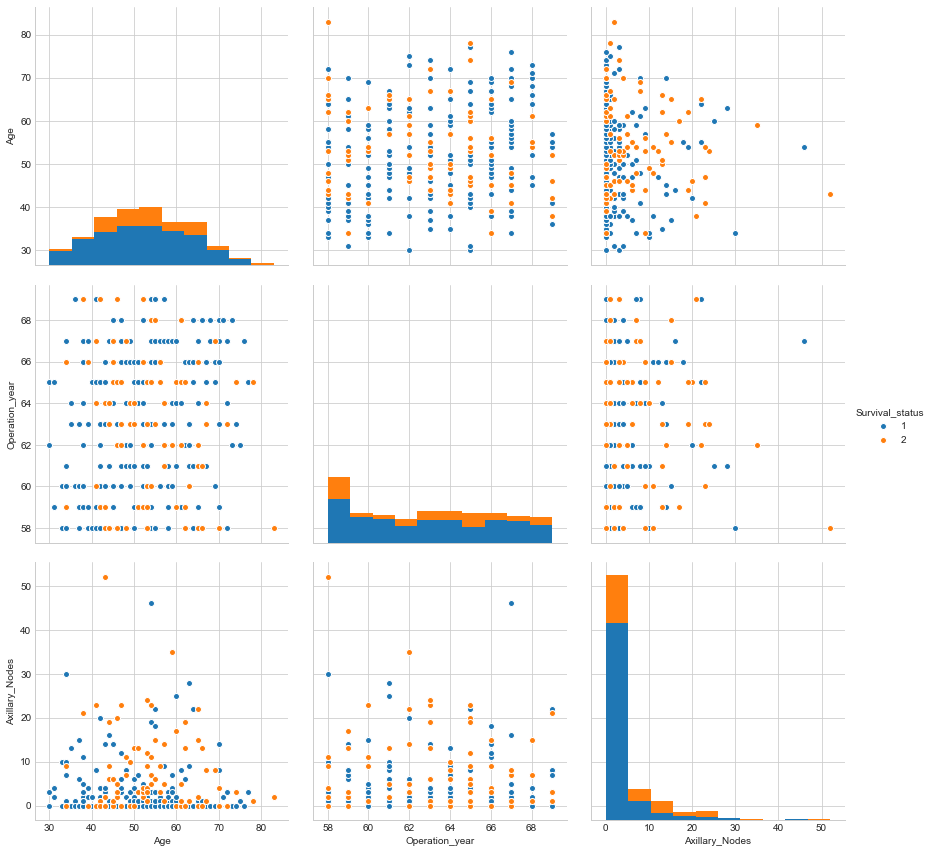

In [31]:
plt.close();
sns.set_style('whitegrid')
sns.pairplot(haber, hue='Survival_status',vars=['Age', 'Operation_year','Axillary_Nodes'], size=4)
plt.show()

Observation:

1. We have total 305 data-points & 4 variables/features.
2. Age, Operation_year, Axillary_Nodes are independent variables/features.
3. Survival_status is dependent variable/class-label.
4. 224 data-points are of patients survived for 5 years or longer and 81 are of patients died within 5 years.
5. 2-D scatter plot and pair-plot are not useful because all features are overlapping.


# Univariate Analysis
   
 # PDF

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


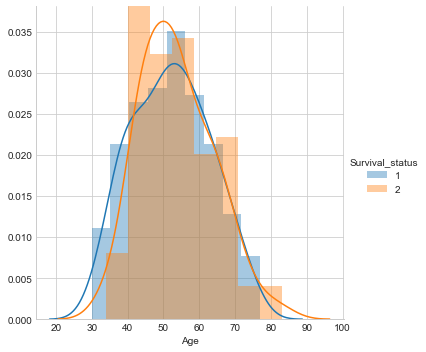

In [39]:
sns.FacetGrid(haber, hue='Survival_status', size=5)\
   .map(sns.distplot,'Age')\
   .add_legend()
plt.show()


C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


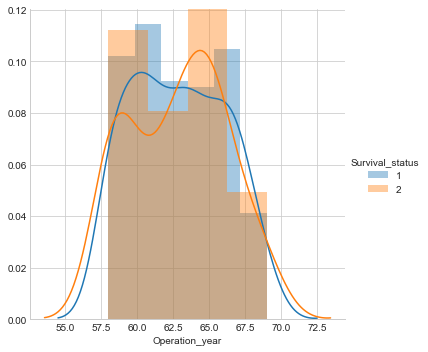

In [38]:
sns.FacetGrid(haber, hue='Survival_status', size=5)\
   .map(sns.distplot,'Operation_year')\
   .add_legend()
plt.show()


C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


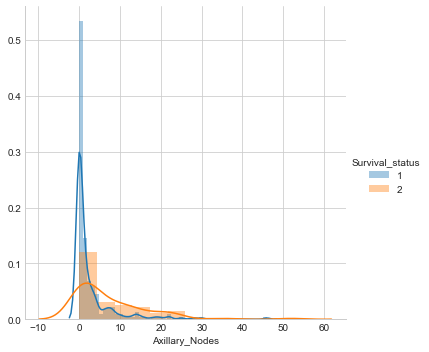

In [40]:
sns.FacetGrid(haber, hue='Survival_status', size=5)\
   .map(sns.distplot,'Axillary_Nodes')\
   .add_legend()
plt.show()

Observation:

    1. Age and Operation_year are not good features because survived and not survived are almost equal and overlapping
       and we will not be able to classify data points.
    2. From all survived patients, most of them come under zero axillary_nodes
    3. Axillary nodes can help in classification of data points of class-label(Survival_status)


# CDF

[0.73214286 0.10267857 0.02678571 0.05357143 0.01339286 0.00892857
 0.02232143 0.00446429 0.00892857 0.00892857 0.00446429 0.
 0.00446429 0.00446429 0.         0.         0.         0.
 0.         0.00446429]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]
[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


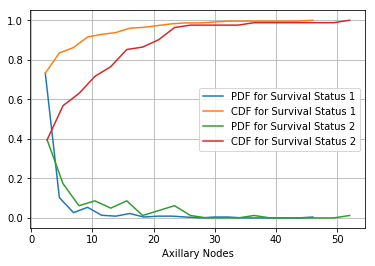

In [10]:
#Fetching values of Data points of Survival Status 1 and 2
survived = haber.loc[haber["Survival_status"] == 1]
nsurvived = haber.loc[haber["Survival_status"] == 2]

#Counts and bin edges of survival status 1
survived_counts, survived_bin_edges = np.histogram(survived["Axillary_Nodes"], bins=20, density=True)
#PDF and CDF of survival status 1
survived_pdf = survived_counts/sum(survived_counts)
print(survived_pdf)
print(survived_bin_edges)
survived_cdf = np.cumsum(survived_pdf)
#plot PDF and CDF
plt.plot(survived_bin_edges[1:], survived_pdf)
plt.plot(survived_bin_edges[1:], survived_cdf)

#Counts and bin edges of survival status 2
nsurvived_counts, nsurvived_bin_edges = np.histogram(nsurvived["Axillary_Nodes"], bins=20, density=True)
#PDF and CDF of survival status 2
nsurvived_pdf = nsurvived_counts/sum(nsurvived_counts)
print(nsurvived_pdf)
print(nsurvived_bin_edges)
nsurvived_cdf = np.cumsum(nsurvived_pdf)
#Plot PDF and CDF
plt.plot(nsurvived_bin_edges[1:], nsurvived_pdf)
plt.plot(nsurvived_bin_edges[1:], nsurvived_cdf)

plt.xlabel("Axillary Nodes")
plt.grid()
plt.legend(["PDF for Survival Status 1", "CDF for Survival Status 1", "PDF for Survival Status 2", "CDF for Survival Status 2"])

plt.show()


Observation:
    1. Patients with axillary nodes < 46(approx) have survival status 1
    2. Patients with axillary nodes > 46(approx) have survival status 2

# Boxplot

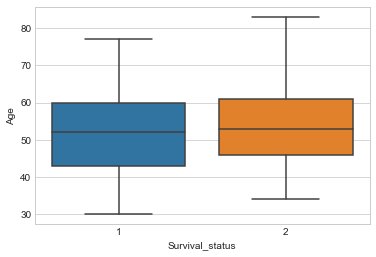

In [31]:
sns.boxplot(x="Survival_status", y="Age", data=haber)
plt.show()

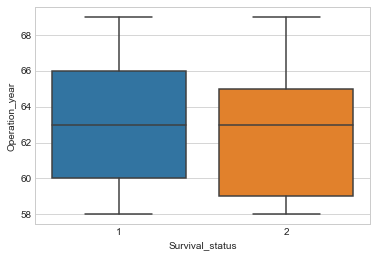

In [32]:
sns.boxplot(x="Survival_status", y="Operation_year", data=haber)
plt.show()

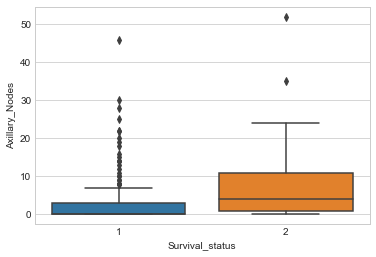

In [33]:
sns.boxplot(x="Survival_status", y="Axillary_Nodes",data=haber)
plt.show()

# Violin Plots

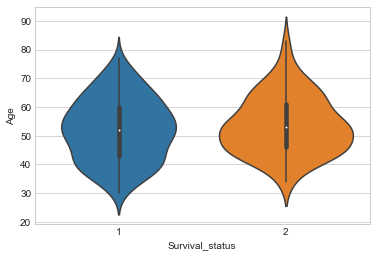

In [28]:
sns.violinplot(x="Survival_status", y="Age",data=haber)
plt.show()

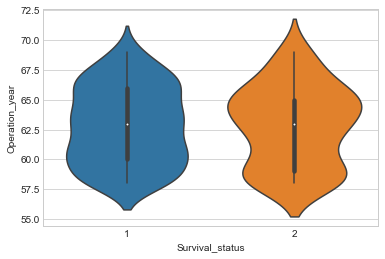

In [29]:
sns.violinplot(x="Survival_status", y="Operation_year", data=haber)
plt.show()

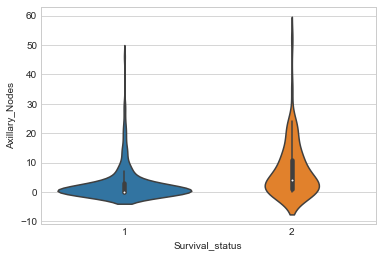

In [30]:
sns.violinplot(x="Survival_status",y="Axillary_Nodes", data=haber)
plt.show()